# Getting started

## Welcome to the hex maze project! There are a variety of tutorial notebooks to help you get started.

### First, read through this notebook fully to understand the basics of how everything works, __then__ move on to the tutorials for your specific needs.

These will be useful for analysis:
- [Demos of useful hex maze functions (`Hex_Maze_Functions.ipynb`)](./10_Hex_Maze_Functions.ipynb)
- [Plotting hex mazes and barrier change sequences (`Plotting_Hex_Mazes.ipynb`)](./11_Plotting_Hex_Mazes.ipynb)

These will be useful for choosing maze configurations for your experiments:
- [Searching the maze configuration database for the mazes you want (`Maze_Configuration_Database_Search.ipynb`)](./20_Maze_Configuration_Database_Search.ipynb)
- [Searching the barrier sequence database for the sequence you want (`Barrier_Sequence_Database_Search.ipynb`)](./21_Barrier_Sequence_Database_Search.ipynb)
- [Generating a custom barrier sequence database with the criteria you want (`Generate_Custom_Barrier_Sequence_Database.ipynb`)](./33_Generate_Custom_Barrier_Sequence_Database.ipynb)

Because the maze configuration databases have already been generated, you probably will not need these unless you are generating new hex mazes with different criteria. Still, it can be very useful to understand how things were created!
- [How the hex maze database was generated (`Generate_Hex_Maze_Database.ipynb`)](./30_Generate_Hex_Maze_Database.ipynb)
- [How the training maze database was generated (`Generate_Training_Maze_Database.ipynb`)](./31_Generate_Training_Maze_Database.ipynb)
- [How the probability change maze database was generated (`Generate_Probability_Change_Database.ipynb`)](./32_Generate_Probability_Change_Database.ipynb)

### First things first: This repo is all about the __hex maze__. 

There are 49 open hexes in the hex maze, numbered 1-49. 

We can represent a hex maze in a variety of ways: a set/list/frozenset/numpy array of integers defining where the barriers are placed (e.g. `{37, 7, 39, 41, 14, 46, 20, 23, 30}`), a comma-separated string defining where barriers are placed (e.g. `"7,14,20,23,30,37,39,41,46"`), or a networkx graph object defining open hexes and the connections between them. 

Because we often define hex mazes by where the barriers are placed, hex maze configurations are also referred to as "barrier sets" or simply "barriers". 

Given this set of integers defining where barriers are placed in the hex maze, we can calculate everything else we need to know about the maze (critical choice points, lengths of reward paths, the optimal paths between ports, etc.)

### Sets of sequential hex mazes that each differ by the movement of a single barrier are called __barrier sequences__.

We represent barrier sequences as a list of sets, where each set defines a hex maze. 

In [1]:
# Most of your notebooks will start with some general imports
import pandas as pd
import numpy as np
import sys
sys.path.append("..")  # Use sys to add the parent directory (where src/hexmaze lives) to the path

In [2]:
# Hex maze configurations are represented as a set of barriers.
example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Barrier change sequences are represented as a list of sequential sets of barriers.
example_barrier_sequence = [{37, 7, 39, 41, 14, 46, 20, 23, 30}, {37, 39, 7, 46, 14, 16, 20, 23, 30},
                            {37, 39, 7, 46, 14, 18, 20, 23, 30}, {39, 7, 46, 14, 18, 20, 23, 26, 30}, 
                            {35, 39, 7, 46, 14, 18, 20, 23, 26}]

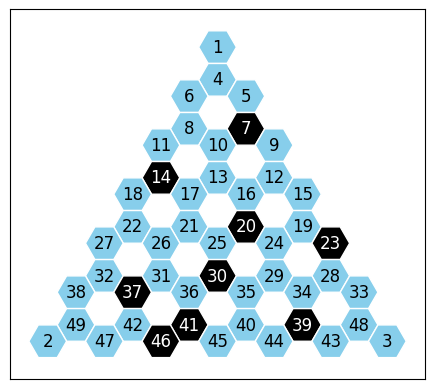

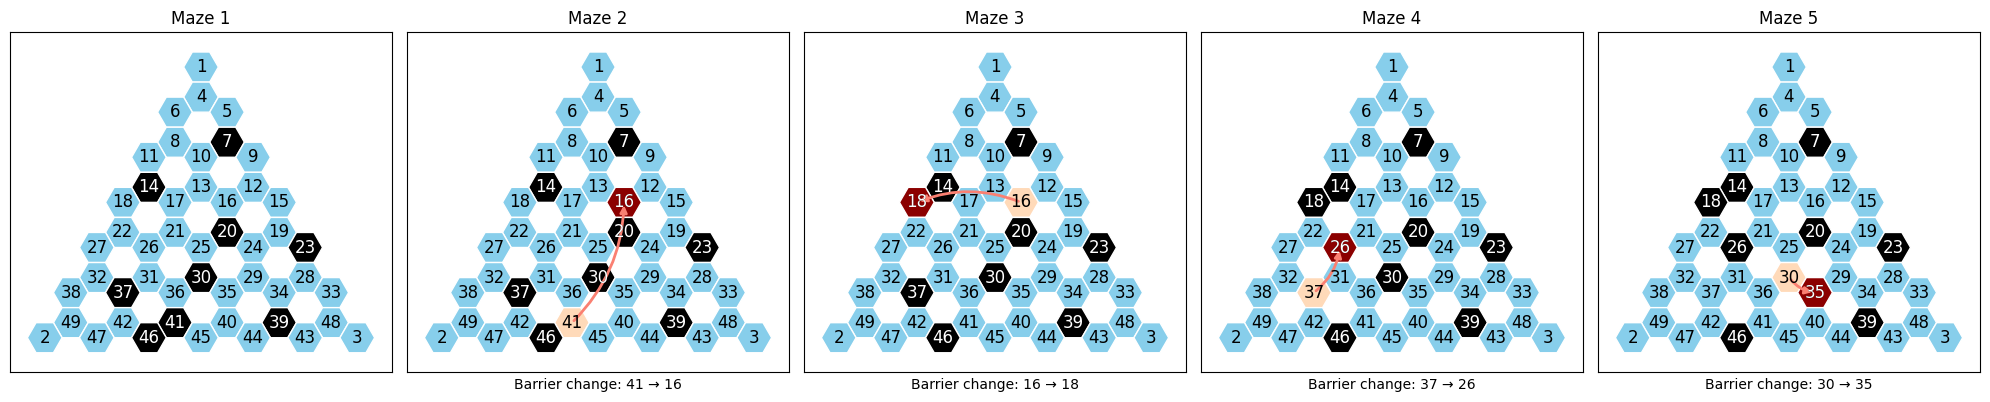

In [3]:
from src.hexmaze import plot_hex_maze, plot_barrier_change_sequence

# A hex maze looks like this!
# Open hexes are shown in light blue and barriers are shown in black.
plot_hex_maze(example_maze, show_barriers=True, show_choice_points=False)

# A barrier change sequence looks like this!
# The now-open hex where the barrier used to be in shown in pink, and the newly blocked hex is shown in dark red
plot_barrier_change_sequence(example_barrier_sequence, same_plot=True, show_choice_points=False)

### Working with the hex maze
`src/hexmaze` provides lots of helpful functions for working with hex mazes. These functions can be imported for use in your notebooks. All functions provide documentation that can be accessed via `help(function_name)`

In [4]:
# Import some example functions from src/hexmaze
from src.hexmaze import plot_hex_maze, get_barrier_change

# View the documentation for these functions
help(plot_hex_maze)

help(get_barrier_change)

Help on function plot_hex_maze in module src.hexmaze.plotting:

plot_hex_maze(barriers=None, old_barrier: Optional[int] = None, new_barrier: Optional[int] = None, show_barriers: bool = True, show_choice_points: bool = False, show_optimal_paths: bool = False, show_arrow: bool = True, show_barrier_change: bool = True, show_hex_labels: bool = True, show_stats: bool = False, reward_probabilities: Optional[Sequence[float]] = None, show_permanent_barriers: bool = False, show_edge_barriers: bool = True, centroids: Optional[Mapping[int, tuple[float, float]]] = None, view_angle: Literal[1, 2, 3] = 1, hex_path: Optional[Sequence[int]] = None, arrows: Optional[Mapping[int, Sequence[int]]] = None, highlight_hexes: Union[set[int], Sequence[set[int]], NoneType] = None, highlight_colors: Union[str, Sequence[str], NoneType] = None, outline_hexes: Union[set[int], Sequence[set[int]], NoneType] = None, outline_colors: Union[str, Sequence[str], NoneType] = None, color_by: Optional[Mapping[int, float]] = N

##### &rArr; __Next steps__: For more information on hex maze representations and demos of useful hex maze functions, check out [`Hex_Maze_Functions.ipynb`](./10_Hex_Maze_Functions.ipynb)

##### &rArr; __Next steps__: To learn about plotting hex mazes and barrier sequences, check out [`Plotting_Hex_Mazes.ipynb`](./11_Plotting_Hex_Mazes.ipynb)

### The databases
We've created a database of lots of different hex maze configurations (and their attributes), and lots of barrier sequences (and their attributes). Many of your notebooks will probably start by loading one or both of these databases.

In [5]:
# Load the database of maze configurations as "df"
df = pd.read_pickle('../Maze_Databases/maze_configuration_database.pkl')
display(df)

,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(37, 39, 7, 41, 14, 46, 20, 23, 30)",15,17,21,"[15, 17, 21]",6,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1,[],0,"{(37, 8, 9, 40, 20, 21, 22, 27, 28), (34, 8, 4..."
1,"(34, 36, 37, 39, 10, 45, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{21},1,[],0,"{(34, 37, 8, 40, 10, 15, 18, 20, 26), (34, 35,..."
2,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,..."
3,"(34, 10, 42, 12, 45, 18, 23, 25, 31)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...",{17},1,[],0,"{(34, 37, 8, 40, 13, 46, 15, 18, 25), (34, 37,..."
4,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [12, 15, 19, 24, 20...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55891,"(34, 36, 7, 10, 42, 46, 19, 22, 25)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...",{17},1,[],0,"{(34, 37, 7, 40, 9, 42, 14, 16, 25), (35, 37, ..."
55892,"(37, 7, 9, 13, 45, 16, 22, 25, 29)",17,19,15,"[17, 19, 15]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 30, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...",{36},1,"[[34, 28, 33, 48, 43, 39]]",1,"{(32, 34, 40, 13, 15, 25, 26, 27, 31), (36, 10..."
55893,"(7, 39, 46, 17, 19, 22, 23, 24, 30)",17,23,17,"[17, 23, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...",{31},1,"[[32, 38, 49, 47, 42, 37]]",1,"{(32, 36, 7, 40, 11, 14, 17, 20, 23), (32, 36,..."
55894,"(34, 10, 11, 42, 45, 15, 22, 25, 30)",17,15,19,"[17, 15, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 19, 23, 28, 3...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...",{16},1,"[[19, 23, 28, 33, 48, 43, 39, 44, 40, 35, 29, ...",1,"{(34, 37, 8, 12, 45, 18, 21, 23, 25), (37, 40,..."


##### &rArr; __Next steps__: To learn about searching the maze configuration database, check out [`Maze_Configuration_Database_Search.ipynb`](./20_Maze_Configuration_Database_Search.ipynb)
##### &rArr; __Next steps__: If you're interested in how the database was generated, check out [`Generate_Hex_Maze_Database.ipynb`](./30_Generate_Hex_Maze_Database.ipynb)

In [6]:
# Load the database of barrier sequences as "barrier_df"
barrier_df = pd.read_pickle('../Barrier_Sequence_Databases/barrier_sequence_database.pkl')
display(barrier_df)

,barrier_sequence,sequence_length,barrier_changes,reward_path_lengths,choice_points
18,"[(39, 7, 10, 42, 18, 20, 23, 26, 30), (37, 39,...",4,"[[26, 37], [10, 17], [20, 24]]","[[25, 19, 17], [15, 19, 19], [25, 17, 19], [17...","[{29}, {17, 26, 29}, {29}, {26}]"
34,"[(34, 36, 37, 7, 45, 14, 17, 20, 28), (34, 36,...",6,"[[17, 25], [36, 26], [26, 41], [41, 32], [34, ...","[[23, 19, 17], [15, 19, 23], [21, 19, 15], [15...","[{35}, {13}, {35}, {26, 35, 13}, {35, 36, 13},..."
45,"[(32, 34, 11, 44, 13, 46, 15, 21, 30), (32, 34...",5,"[[13, 16], [16, 10], [30, 20], [20, 36]]","[[21, 15, 19], [17, 25, 19], [19, 15, 19], [19...","[{24}, {31}, {16, 24, 31}, {31}, {16}]"
46,"[(37, 7, 42, 44, 14, 20, 25, 28, 31), (37, 7, ...",5,"[[31, 17], [17, 16], [16, 30], [37, 21]]","[[15, 17, 21], [23, 17, 17], [15, 19, 17], [15...","[{13}, {29}, {26}, {26, 13, 29}, {29}]"
60,"[(34, 37, 10, 45, 14, 15, 24, 25, 27), (34, 37...",4,"[[24, 39], [39, 28], [27, 36]]","[[19, 21, 15], [19, 15, 17], [19, 17, 15], [17...","[{36}, {16, 24, 36}, {16, 35, 36}, {16}]"
...,...,...,...,...,...
55834,"[(39, 8, 42, 16, 19, 21, 25, 27, 30), (39, 8, ...",5,"[[16, 10], [21, 36], [36, 17], [17, 24]]","[[17, 23, 17], [19, 15, 17], [17, 15, 19], [21...","[{31}, {16, 29, 31}, {16}, {29}, {31}]"
55848,"[(7, 42, 44, 14, 20, 23, 28, 30, 31), (7, 42, ...",4,"[[31, 17], [17, 37], [30, 17]]","[[15, 17, 21], [23, 17, 17], [15, 17, 19], [23...","[{13}, {29}, {26, 13, 29}, {29}]"
55850,"[(36, 39, 8, 10, 42, 19, 21, 24, 27), (39, 8, ...",4,"[[36, 30], [24, 17], [21, 24]]","[[19, 17, 23], [19, 25, 17], [21, 15, 17], [17...","[{16}, {31}, {29}, {31}]"
55852,"[(37, 8, 9, 45, 20, 21, 23, 27, 29), (35, 37, ...",5,"[[29, 35], [35, 34], [37, 36], [36, 31]]","[[19, 21, 15], [19, 17, 25], [19, 19, 15], [17...","[{36}, {13}, {35, 36, 13}, {13}, {35}]"


##### &rArr; __Next steps__: To learn about searching the barrier sequence database, check out [`Barrier_Sequence_Database_Search.ipynb`](./21_Barrier_Sequence_Database_Search.ipynb)
##### &rArr; __Next steps__: If you're interested in generating barrier sequences with custom criteria, check out [`Generate_Custom_Barrier_Sequence_Database.ipynb`](./33_Generate_Custom_Barrier_Sequence_Database.ipynb)




### Now you're ready to explore the other tutorials! Happy hex maze-ing!